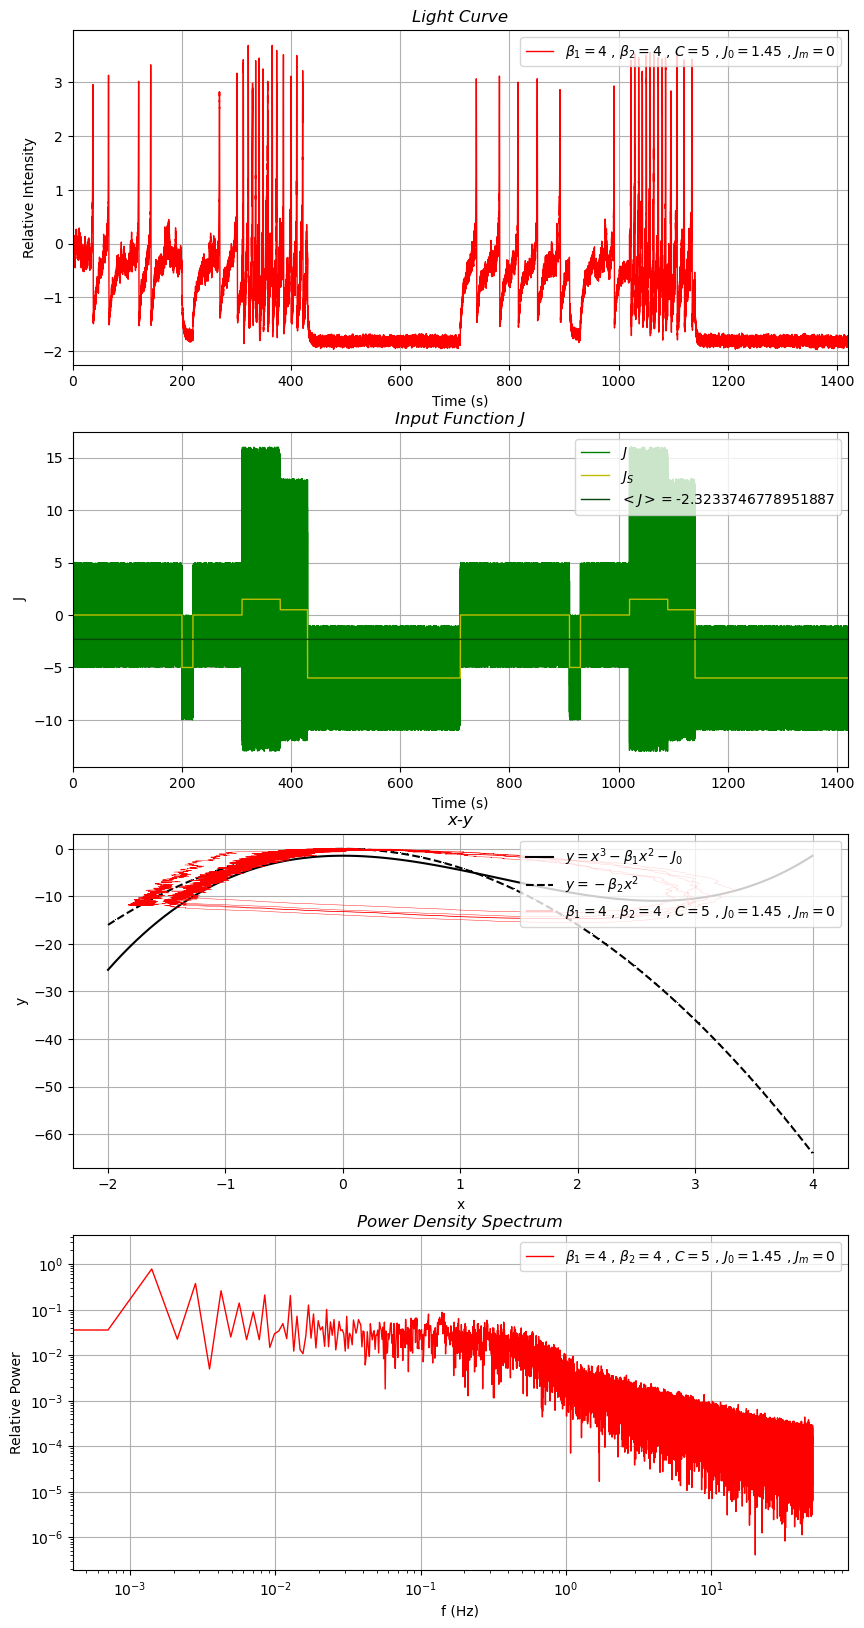

In [4]:
#复现第二篇论文：解MHR模型，通过修改β1、β2、C、J0、Jm的值得到不同类型的相对强度、输入参数J、傅里叶变换后的相对强度
#λ

import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

Fs=100#采样频率
dt=1/Fs#采样周期，即相邻两数据点的时间间隔
T=710#信号的周期
n_T=2#信号的出现次数
n=int(n_T*T/dt)#信号长度

x=np.zeros(n,dtype=float)
y=np.zeros(n,dtype=float)
vx=np.zeros(n,dtype=float)
vy=np.zeros(n,dtype=float)
t=np.arange(n)*dt

ρ=1
β1=4
β2=4

C=5
J0=1.45
Jm=0
m=1
l=1
#nT=10000#输入方程J的周期长度
#nt1=1600#输入方程J的上升时间

J_S=np.zeros(n,dtype=float)
J=np.zeros(n,dtype=float)
for j in range(n_T):
    for i in range(int(j*T/dt),int(200/dt)+int(j*T/dt)):
        J_S[i]=0
        J[i]=J_S[i]+10*(np.random.random()-0.5)
    for i in range(int(200/dt)+int(j*T/dt),int(220/dt)+int(j*T/dt)):
        J_S[i]=-5
        J[i]=J_S[i]+10*(np.random.random()-0.5)
    for i in range(int(220/dt)+int(j*T/dt),int(310/dt)+int(j*T/dt)):
        J_S[i]=0
        J[i]=J_S[i]+10*(np.random.random()-0.5)
    for i in range(int(310/dt)+int(j*T/dt),int(380/dt)+int(j*T/dt)):
        J_S[i]=1.5
        J[i]=J_S[i]+29*(np.random.random()-0.5)
    for i in range(int(380/dt)+int(j*T/dt),int(430/dt)+int(j*T/dt)):
        J_S[i]=0.5
        J[i]=J_S[i]+25*(np.random.random()-0.5)
    for i in range(int(430/dt)+int(j*T/dt),int(710/dt)+int(j*T/dt)):
        J_S[i]=-6
        J[i]=J_S[i]+10*(np.random.random()-0.5)

#计算
for i in range(0,n-1):
    vx[i+1]=-ρ*(x[i]**3)+β1*(x[i]**2)+y[i]+J[i]
    vy[i+1]=-β2*(x[i]**2)-y[i]
    x[i+1]=x[i]+vx[i+1]*dt
    y[i+1]=y[i]+vy[i+1]*dt

#绘图
fig=plt.figure(figsize=(10,20))

#绘制x的图像，由于数据量较大，只展示前percent
percent=1
ax1=fig.add_subplot(4,1,1)
ax1.plot(t[:int(percent*n)],x[:int(percent*n)],'r',lw=1,label=r'$\beta_1=$'+str(β1)+' , '+r'$\beta_2=$'+str(β2)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+' , '+r'$J_m=$'+str(Jm))
ax1.set_title(r'Light Curve',fontstyle='italic')
ax1.set_xlabel(r'Time (s)')
ax1.set_ylabel(r'Relative Intensity')
ax1.set_xlim(0, percent*n*dt)
ax1.legend(loc = 'upper right')
ax1.grid()

#绘制J的图像，由于数据量较大，只展示前percent
ax2=fig.add_subplot(4,1,2)
ax2.plot(t[:int(percent*n)],J[:int(percent*n)],'g',lw=1,label=r'$J$')
ax2.plot(t[:int(percent*n)],J_S[:int(percent*n)],'y',lw=1,label=r'$J_S$')
ax2.plot(t[:int(percent*n)],np.ones(int(percent*n))*np.mean(J),'#06470c',lw=1,label=r'$<J>=$'+str(np.mean(J)))
ax2.set_title(r'Input Function J',fontstyle='italic')
ax2.set_xlabel(r'Time (s)')
ax2.set_ylabel(r'J')
ax2.set_xlim(0, percent*n*dt)
ax2.legend(loc = 'upper right')
ax2.grid()

#绘制x-y图像
ax3=fig.add_subplot(4,1,3)
x_t=np.linspace(-2,4,100)
y1=ρ*(x_t**3)-β1*(x_t**2)-J0
y2=-β2*(x_t**2)
ax3.plot(x_t,y1,'k',label=r'$y=x^3-\beta_1 x^2-J_0$')
ax3.plot(x_t,y2,'k,--',label=r'$y=-\beta_2 x^2$')
persent_xy=0.2
ax3.plot(x[:int(persent_xy*n)],y[:int(persent_xy*n)],'r',lw=0.3,label=r'$\beta_1=$'+str(β1)+' , '+r'$\beta_2=$'+str(β2)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+' , '+r'$J_m=$'+str(Jm))
ax3.set_title(r'x-y',fontstyle='italic')
ax3.set_xlabel(r'x')
ax3.set_ylabel(r'y')
ax3.legend(loc = 'upper right')
ax3.grid()

#x的傅里叶变换,双侧频谱
ax4=fig.add_subplot(4,1,4)
ax4.plot(np.arange(int(n/2))*Fs/n,2*np.abs(fft(x))[:int(n/2)]/n,'r',lw=1,label=r'$\beta_1=$'+str(β1)+' , '+r'$\beta_2=$'+str(β2)+' , '+r'$C=$'+str(C)+' , '+r'$J_0=$'+str(J0)+' , '+r'$J_m=$'+str(Jm)) 
ax4.set_title(r'Power Density Spectrum',fontstyle='italic')
ax4.set_xlabel(r'f (Hz)')
ax4.set_ylabel(r'Relative Power')
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.legend(loc = 'upper right')
ax4.grid()

plt.show()